In [23]:
import numpy as np
import random as rd
# Fonction d'évaluation corrigée
def score(planning, preferences, g=None, N=7):
    n_jours, n_medecins = np.shape(np.array(planning))
    score_total = 0

    # Si g n'est pas fourni, générer un g avec la taille correcte
    if g is None:
        g = [rd.randint(1, 7) for _ in range(n_medecins)]
    
    # Calculer le score en utilisant la fonction heuristique
    for jour in range(n_jours):
        for i in range(n_medecins):
            if planning[jour][i] != 'R':  # Si le médecin est en garde ou astreinte
                # Si jour >= N, on calcule les gardes des N derniers jours
                if jour >= N:
                    nb_gardes_effectues = np.sum(np.array(planning)[jour - N:jour, i] == 'G', axis=0)
                else:
                    # Sinon, on considère tous les jours jusqu'au jour actuel
                    nb_gardes_effectues = np.sum(np.array(planning)[:jour+1, i] == 'G', axis=0)

                n_i = nb_gardes_effectues  # Nombre de gardes effectuées pour le médecin i sur les N derniers jours
                p_i = preferences[jour][i]  # Préférence pour ce jour
                g_i = g[i]  # Nombre de gardes désiré pour le médecin i sur la période de N jours

                # Calcul du score total avec la pénalité pour le nombre de gardes effectué
                score_total += p_i * (g_i / N) * ((N - n_i) / N)
    for day in planning:
    # Vérifie le nombre de gardes et d'astreintes par jour
        num_gardes = day.count('G')
        num_astreintes = day.count('A')
        if num_gardes != 1:
            score_total -= abs(num_gardes - 1) * 10  # Pénalité pour chaque garde en trop ou manquante
        if num_astreintes != 1:
            score_total -= abs(num_astreintes - 1) * 10  # Pénalité pour chaque astreinte en trop ou manquante
    

    return score_total

Pref + planning

In [24]:
import pandas as pd
filepath = '/kaggle/input/planning/planning test-2.xlsx'
def recup_acr(file_path = filepath,sheet=0):
    '''Fonction d'extraction des acronymes de
    puis le planning fourni en file_path'''

    # Récupérer le fichier Excel
    xls = pd.ExcelFile(filepath)
    df_synthese = pd.read_excel(xls, sheet_name=sheet)

    # Extraire les acronymes
    relevant_line = list(df_synthese.iloc[1])
    acronyms = []
    col = 9

    # Boucle pour récupérer les acronymes jusqu'à une cellule vide
    while col < len(relevant_line) and pd.notna(relevant_line[col]):
        acronyms.append(relevant_line[col])
        col += 1

    return acronyms

def recup_pref(sheet=0):
    '''Fonction de récupération des préférences depuis le planning fourni en file_path'''
    # Récupérer le fichier Excel

    xls = pd.ExcelFile(filepath)
    df_synthese = pd.read_excel(xls, sheet_name=sheet)

    relevant_columns = df_synthese.iloc[3:186, 9:len(recup_acr(filepath,sheet))+9]

    relevant_columns = relevant_columns.fillna(0)

    pref = []
    for ligne in relevant_columns.iloc:
        pref.append(list(ligne))

    return pref


In [25]:
n_jours = 183

rd.seed(42)
prefG = recup_pref()

planningdepart = [['R', 'R', 'R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R' , 'R', 'R'], ['R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'A', 'R', 'R','R', 'R', 'R', 'R', 'R'], ['R', 'R', 'G', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R',  'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['A', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R ', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'R', 'R', 'G',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'G', 'R', 'R' , 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', ' A', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['G', 'R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',  'R', 'R', 'R'], ['R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'A', 'R', 'R', 'R ', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'R', 'R', 'A', 'R', 'R', 'G', 'R',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'R', 'R', 'A', 'R', 'R' , 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'R', 'R', ' R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R'], ['R', 'R', 'R',  'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R'], ['R ', 'R', 'R', 'R', 'R', 'A', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R ', 'R'], ['A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R',  'R', 'R', 'R', 'R'], ['G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'A', 'R', 'R' , 'R', 'R', 'R', 'R', 'R', 'R'], ['A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', ' R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'A', 'R', 'R', 'R', 'G',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'R', 'A ', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R',  'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'A', 'R', 'R', 'R', 'R'],  ['R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R' , 'R', 'R'], ['A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', ' R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'A',  'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'R', 'G', 'R', 'A', 'R', 'R ', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'A', 'R', 'R',  'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'R' , 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', ' R', 'R', 'A', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', ' R'], ['R', 'R', 'R', 'A', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',  'R', 'R', 'R'], ['G', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R ', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'A',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'R', 'R', 'R', 'R', 'R' , 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'R', 'G', ' R', 'R', 'R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R'], ['R ', 'R', 'A', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R ', 'R'], ['R', 'A', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R',  'R', 'R', 'R', 'R'], ['G', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R' , 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', ' R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'R', 'R', 'R', 'R',  'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'G', 'R', 'A', 'R ', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'],  ['G', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R' , 'R', 'R'], ['R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'A', 'R', 'R', ' R', 'R', 'R', 'R', 'R'], ['R', 'R', 'G', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R',  'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'R', 'R', 'A', 'R', 'R', 'R ', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'R', 'R', 'G',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'A', 'R' , 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', ' A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', ' R'], ['R', 'R', 'R', 'A', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',  'R', 'R', 'R'], ['R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R ', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'A', 'R', 'R', 'G', 'R', 'R', 'R', 'R',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'A', 'R', 'R', 'R', 'R', 'G' , 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'G', 'R', 'R', ' R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'A',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R'], ['R ', 'R', 'R', 'G', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R ', 'R'], ['R', 'R', 'A', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',  'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'A', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R' , 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'G', 'A', 'R', 'R', 'R', 'R', 'R', ' R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'A', 'R', 'R', 'R',  'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'G', 'R ', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'A', 'R', 'R', 'R', 'R'], ['R', 'R',  'R', 'A', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'],  ['R', 'R', 'R', 'R', 'A', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R' , 'R', 'R'], ['R', 'R', 'R', 'A', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', ' R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'A', 'R', 'R', 'G', 'R', 'R', 'R', 'R',  'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'G', 'A', 'R', 'R', 'R', 'R ', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'R', 'A', 'R',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R'], ['R', 'R', 'R', 'A' , 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', ' R', 'R', 'A', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', ' R'], ['G', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',  'R', 'R', 'R'], ['A', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R ', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'R', 'A', 'R', 'R', 'R' , 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'R', 'A', ' R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R',  'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['A ', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R ', 'R'], ['R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R',  'R', 'R', 'R', 'R'], ['R', 'G', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R' , 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'R', 'R', 'R', 'R', 'G', 'R', ' R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'R', 'R', 'G', 'R',  'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'G', 'R ', 'R', 'R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['G', 'A',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'],  ['R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R' , 'R', 'R'], ['R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', ' R', 'R', 'R', 'R', 'R'], ['R', 'R', 'A', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R',  'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'R', 'R', 'R', 'R', 'G', 'R ', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['G', 'R', 'R', 'A', 'R', 'R',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'R' , 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R'], ['R', ' A', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', ' R'], ['R', 'R', 'R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R',  'R', 'R', 'R'], ['R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R ', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'G', 'R',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'R', 'R', 'R', 'R', 'R' , 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'A', 'R', 'R', ' R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R',  'R', 'A', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R ', 'A', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R ', 'R'], ['R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R',  'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R' , 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'G', 'R', 'R', 'R', 'A', 'R', 'R', 'R', ' R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'G', 'R', 'R', 'R', 'R',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'R', 'R ', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['G', 'R',  'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'],  ['R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R' , 'R', 'R'], ['R', 'R', 'A', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', ' R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',  'R', 'G', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'A', 'R', 'G', 'R', 'R', 'R ', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'R', 'R', 'R',  'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'R' , 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R'], ['A', ' R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', ' R'], ['R', 'A', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R',  'R', 'R', 'R'], ['G', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R ', 'R', 'R', 'R', 'R', 'R'], ['A', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'G', 'R', 'R', 'R', 'R' , 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'R', 'R', ' R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'A',  'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R ', 'A', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R ', 'R'], ['R', 'A', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',  'R', 'R', 'R', 'R'], ['R', 'G', 'R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R' , 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', ' G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'R', 'A', 'R', 'G',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'A', 'R ', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A',  'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'],  ['R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R' , 'R', 'R'], ['R', 'A', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', ' R', 'R', 'R', 'R', 'R'], ['R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G',  'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['G', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R ', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'R', 'R', 'G',  'R', 'R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'G' , 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', ' R', 'R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', ' R'], ['R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R',  'R', 'R', 'R'], ['R', 'R', 'R', 'R', 'R', 'A', 'R', 'R', 'R', 'G', 'R', 'R', 'R ', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'A', 'R',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'A', 'R', 'R', 'R', 'R' , 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R'], ['R', 'A', 'R', 'R', 'G', ' R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R',  'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R ', 'R', 'R', 'A', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R ', 'R'], ['R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',  'G', 'R', 'R', 'R'], ['R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R' , 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', ' A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['G', 'R', 'R', 'A', 'R', 'R', 'R',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'R', 'R ', 'A', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R',  'R', 'R', 'R', 'A', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'],  ['G', 'R', 'R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R' , 'R', 'R'], ['R', 'A', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', ' R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'G', 'R', 'R',  'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'R', 'R', 'G', 'R', 'R', 'R ', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'R', 'R', 'A',  'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'G', 'R', 'R' , 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', ' A', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', ' R'], ['R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R',  'R', 'R', 'R'], ['R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R ', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'A', 'R', 'R', 'R', 'G', 'R', 'R',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'G', 'R', 'R', 'R', 'R' , 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'A', 'R', ' R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R',  'A', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R ', 'G', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R ', 'R'], ['R', 'A', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R',  'R', 'R', 'R', 'R'], ['G', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R' , 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'G', 'R', 'R', 'R', 'R', 'R', ' R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['A', 'R', 'R', 'R', 'R', 'R', 'R',  'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'R', 'R ', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A',  'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'],  ['R', 'R', 'A', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R' , 'R', 'R'], ['A', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', ' R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R',  'G', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'R', 'G', 'R', 'A', 'R', 'R ', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'A', 'R', 'R',  'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'R' , 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', ' R', 'G', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', ' R'], ['R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R',  'R', 'R', 'R'], ['G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'A', 'R', 'R ', 'R', 'R', 'R', 'R', 'R'], ['A', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R', 'R', 'R', 'R', 'G', 'R' , 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'A', 'R', ' R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'R',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R'], ['R ', 'G', 'R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R ', 'R'], ['R', 'A', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R',  'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'G' , 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'R', 'A', 'G', 'R', 'R', 'R', 'R', 'R', ' R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A', 'G', 'R', 'R', 'R', 'R',  'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'G', 'R', 'R', 'R ', 'R', 'R', 'R', 'R', 'A', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'], ['R', 'A',  'R', 'R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R'],  ['R', 'R', 'A', 'R', 'R', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R' , 'R', 'R'], ['R', 'A', 'R', 'G', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', ' R', 'R', 'R', 'R', 'R'], ['R', 'R', 'R', 'R', 'R', 'G', 'R', 'R', 'A', 'R', 'R',  'R', 'R', 'R', 'R', 'R', 'R', 'R']]

print((len(planningdepart),len(planningdepart[1])))
print(score(planningdepart,prefG))

(183, 18)
7.326530612245051


planning legal ?

In [17]:
def verif_planning(planning):
    '''True si le planning est 'légal' (une garde et une astreinte par jour)'''
    planningbon=True
    nbmedecins=len(planning[0])
    for i in range (len(planning)):
        nbg=0
        nba=0
        for j in range (nbmedecins):
            if (planning[i][j]=='A'):
                nba+=1
            elif (planning[i][j]=='G'):
                nbg+=1
        if (nbg!=1 or nba!=1):
            #print(f"verif_planning : nba : {nba}, nbg : {nbg}, jour : {i}")
            planningbon=False
    return planningbon


algo tabou

In [8]:
import copy

def voisin(planning,Tabou):
    vois=[]
    nbmedecins=len(planning[0])
    for i in range(len(planning)):
        planningactuel=copy.deepcopy(planning)
        rdint=rd.randint(1,2)
        if (rdint==1):
            placeA=None
            for j in range(nbmedecins):
                if (planningactuel[i][j]=='A'):
                    placeA=j
                    break
            if placeA is not None:
                rdmed=rd.randint(0,nbmedecins-1)
                while (rdmed==placeA):
                    rdmed=rd.randint(0,nbmedecins-1)
                planningactuel[i][placeA],planningactuel[i][rdmed]=planningactuel[i][rdmed],planningactuel[i][placeA]
        elif (rdint==2):
            placeG=None
            for j in range(nbmedecins):
                if (planningactuel[i][j]=='G'):
                    placeG=j
                    break
            if placeG is not None:
                rdmed=rd.randint(0,nbmedecins-1)
                while (rdmed==placeG):
                    rdmed=rd.randint(0,nbmedecins-1)
                planningactuel[i][placeG],planningactuel[i][rdmed]=planningactuel[i][rdmed],planningactuel[i][placeG]
        #print(vois)
        if planningactuel not in Tabou:
            vois.append(planningactuel)
    return vois

def algo_tab(planning,plann_pref):
    meilleurscore = score(planning,plann_pref)
    print("Score du planning d'entrée : ", meilleurscore)
    meilleursol=planning
    iter=0
    Tabou=[planning]
    meilleuriter=0
    nbmax=10
    while iter-meilleuriter<nbmax:
        iter+=1
        print ("Itération n°",iter)
        vois=voisin(planning,Tabou)
        if vois:
            bestvois=vois[0]
        else:
            bestvois=planning
        scorebestvois=score(bestvois,plann_pref)
        for i in range(len(vois)):
            scorei=score(vois[i],plann_pref)
            if (scorei>scorebestvois):
                bestvois=vois[i]
                scorebestvois=scorei
        #print(vois)
        Tabou.append(bestvois)
        if (scorebestvois>meilleurscore):
            meilleursol=bestvois
            meilleuriter=iter
            meilleurscore=scorebestvois
    return (meilleurscore)
rd.seed(42)
algo_tab(planningdepart,prefG)

Score du planning d'entrée :  7.326530612245051
Itération n° 1
Itération n° 2
Itération n° 3
Itération n° 4
Itération n° 5
Itération n° 6
Itération n° 7
Itération n° 8
Itération n° 9
Itération n° 10
Itération n° 11
Itération n° 12
Itération n° 13
Itération n° 14


73.22448979591857

Génétique

RS

In [9]:
import copy
def algo_gen(plann,plann_pref,cran_arret=50):
   
    print("Score du planning d'entrée : ",score(plann,plann_pref))

    #Variables

    pmut = 0.65 #proba de mutation
    Npopu = 10 #nombre d'individus par génération
    iter = 0 #compteur d'itérations
    best_planning = [None,float('-inf')] #retiendra le meilleur planning trouvé et sa score

    #Initialisation

    popu = [] #sera une population de Npopu plannings

    for _ in range(Npopu):
        popu.append(plann) #ajout de Npopu solutions initiales dans la population

    #algo en soi

    while iter != cran_arret :
        if iter%50 == 0:
            print('Itération n°',iter)

        #Evaluation

        fit = [score(individu,plann_pref) for individu in popu]
        
        if max(fit) > best_planning[1] :
            #print("\nalgo_gen : modification du best planning")
            best_planning[0] = popu[fit.index(max(fit))]
            best_planning[1] = max(fit)

        #Sélection

        tmp = []

        for _ in range(3):
            tmp.append(popu[fit.index(max(fit))]) #on récupère trois fois le meilleur élément de la population précédente

        fit.pop(fit.index(max(fit)))
        tmp.append(popu[fit.index(max(fit))]) #on récupère 1 fois le deuxieme élément de la popu précédente

        fit.pop(fit.index(max(fit)))
        tmp.append(popu[fit.index(max(fit))]) #on récupère 1 fois le troisieme élément de la popu précédente

        popu = tmp.copy()

        #Filiation

        popu.append(post_crossover_validation(popu[0],popu[3]))
        popu.append(post_crossover_validation(popu[3],popu[0]))
        popu.append(post_crossover_validation(popu[0],popu[4]))
        popu.append(post_crossover_validation(popu[4],popu[0]))
        popu.append(post_crossover_validation(popu[3],popu[4]))

        #Mutation

        for i in range(Npopu):
            if rd.random()<pmut:
                popu[i] = muter_indiv(popu[i])
                #print(f"\nalgo_gen : mutation de l'individu n°{i}")
            else:
                #rien
                pass

        iter += 1



    #fin while
    return best_planning[1]

def muter_indiv(indiv):
    '''Mute l'individu indiv entre 1 et 12 fois'''
    nb_mutations = rd.randint(1,12)

    for _ in range(0,nb_mutations):
        jour = rd.randint(0,len(indiv)-1)
        med1 = rd.randint(0,len(indiv[0])-1)
        med2 = rd.randint(0,len(indiv[0])-1)
        while med1 == med2 :
            med2 = rd.randint(0,len(indiv[0])-1)
        cpy_tmp = copy.deepcopy(indiv)
        cpy_tmp[jour][med1],cpy_tmp[jour][med2] = cpy_tmp[jour][med2],cpy_tmp[jour][med1]

        c = 0

    return indiv

def post_crossover_validation(parent1, parent2) :
    '''Crée un "enfant" et le valide à posteriori, renvoie parent1 si aucun des deux enfants possibles n'est légal'''

    parent1_pre, parent1_post = [parent1[i] for i in range(int(len(parent1)/2))], [parent1[i] for i in range(int(len(parent1)/2),len(parent1))]
    parent2_pre, parent2_post = [parent2[i] for i in range(int(len(parent2)/2))], [parent2[i] for i in range(int(len(parent2)/2),len(parent2))]


    return parent1
rd.seed(42)
algo_gen(planningdepart,prefG,cran_arret=50)

Score du planning d'entrée :  7.326530612245051
Itération n° 0


([['R',
   'R',
   'R',
   'R',
   'R',
   'A',
   'R',
   'R',
   'R',
   'R',
   'R',
   'G',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R'],
  ['R',
   'R',
   'R',
   'R',
   'R',
   'G',
   'R',
   'R',
   'R',
   'R',
   'A',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R'],
  ['R',
   'R',
   'G',
   'R',
   'R',
   'A',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R'],
  ['A',
   'G',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R ',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R'],
  ['R',
   'A',
   'R',
   'R',
   'R',
   'G',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R'],
  ['R',
   'G',
   'R',
   'R',
   'A',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R'],
  ['R',
   ' A',
   'R',
   'R',
   'R',
   'R',
   'R',
   'G',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',
   'R',


In [19]:
import random as rd
import numpy as np


def voisins(S, nbvoisins):
    res = []
    n, m = np.shape(S)
    while len(res) < nbvoisins:
        voisin = S.copy()
        i = rd.randint(0, n - 1)
        # Réinitialiser la ligne i avec des repos
        for k in range(m):
            voisin[i][k] = 'R'
        # Assigner une garde et une astreinte
        j1, j2 = (rd.randint(0, m - 1), rd.randint(0, m - 1))
        if j1 != j2:
            voisin[i][j1] = 'A'
            voisin[i][j2] = 'G'
        if verif_planning(voisin):
            res.append(voisin)
    return res

def best_fit(liste,pref):
    res = 0
    max = score(liste[0],pref)
    for i in range(len(liste)):
        if score(liste[i],pref) > max : 
            res = i
    return liste[i]

# Algorithme de recuit simulé
def algo_rec(S, plann_pref, T=100, a=0.95, nbiter_cycle=10, nbvoisins=10):
    print(score(S,plann_pref))
    S_etoile = S
    nouveau_cycle = True
    k = 0  # Compteur d'itérations
    i = 0
    while nouveau_cycle and i < 6:
        nbiter = 0
        nouveau_cycle = False

        while nbiter < nbiter_cycle:
            print("Itération n°",nbiter)
            k += 1
            nbiter += 1
            S_rand = best_fit(voisins(S, nbvoisins), plann_pref)
            delta_E = score(S_rand, plann_pref) - score(S, plann_pref)

            if delta_E < 0:
                S = S_rand
                nouveau_cycle = True
            else:
                prob = np.exp(-delta_E / T)
                q = np.random.rand()
                if q < prob:
                    S = S_rand
                    nouveau_cycle = True

            if score(S, plann_pref) > score(S_etoile, plann_pref):
                S_etoile = S
        i+=1

        T = a * T

    return (S_etoile,score(S_etoile,plann_pref))
rd.seed(42)
algo_rec(planningdepart,prefG)

-348.1836734693877
Itération n° 0
Itération n° 1
Itération n° 2
Itération n° 3
Itération n° 4
Itération n° 5
Itération n° 6
Itération n° 7
Itération n° 8
Itération n° 9
Itération n° 0
Itération n° 1
Itération n° 2
Itération n° 3
Itération n° 4
Itération n° 5
Itération n° 6
Itération n° 7


KeyboardInterrupt: 

essaim de particules

7.326530612245051
Iteration 1/100, Best Score: 66.91836734693894
Iteration 2/100, Best Score: 66.91836734693894
Iteration 3/100, Best Score: 66.91836734693894
Iteration 4/100, Best Score: 66.91836734693894
Iteration 5/100, Best Score: 66.91836734693894
Iteration 6/100, Best Score: 66.91836734693894
Iteration 7/100, Best Score: 66.91836734693894
Iteration 8/100, Best Score: 66.91836734693894
Iteration 9/100, Best Score: 66.91836734693894
Iteration 10/100, Best Score: 66.91836734693894
Iteration 11/100, Best Score: 66.91836734693894
Iteration 12/100, Best Score: 66.91836734693894
Iteration 13/100, Best Score: 66.91836734693894
Iteration 14/100, Best Score: 66.91836734693894
Iteration 15/100, Best Score: 66.91836734693894
Iteration 16/100, Best Score: 66.91836734693894
Iteration 17/100, Best Score: 66.91836734693894
Iteration 18/100, Best Score: 66.91836734693894
Iteration 19/100, Best Score: 66.91836734693894
Iteration 20/100, Best Score: 66.91836734693894
Iteration 21/100, Best Score: 6

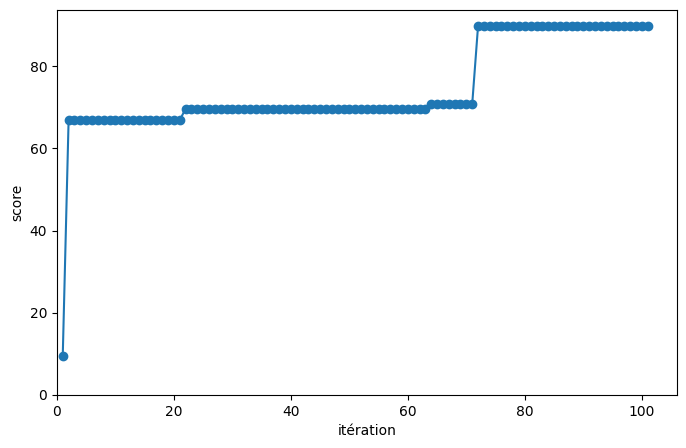

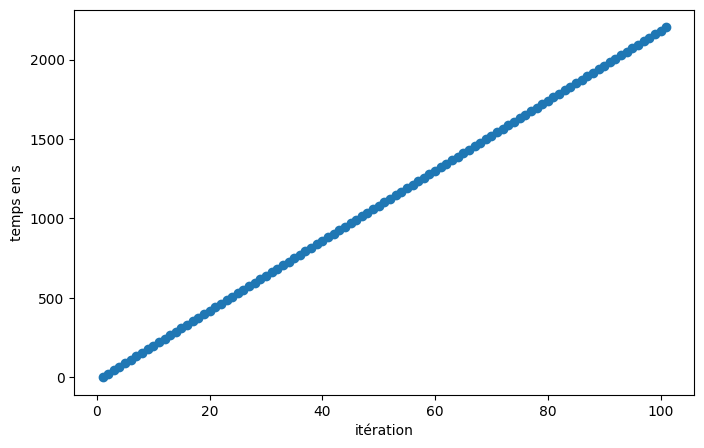

In [42]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt
from time import monotonic

# Paramètres
num_medics = 18
num_days = 183
num_particles = 100
max_iterations = 100

# Initialisation des particules
particles = [planningdepart for _ in range(num_particles)]
velocities = [np.zeros((num_days, num_medics)) for _ in range(num_particles)]
personal_best_positions = particles[:]
personal_best_scores = [score(p, prefG) for p in particles]
global_best_position = personal_best_positions[np.argmax(personal_best_scores)]
global_best_score = max(personal_best_scores)

rd.seed(42)
p = planningdepart
print(score(p,prefG))
Y = [score(planningdepart,prefG)]
# PSO principal
start = monotonic()
Times = [0]
for iteration in range(max_iterations):
    for i in range(num_particles):
        r1, r2 = np.random.rand(), np.random.rand()
        velocities[i] = (
            velocities[i]
            + r1 * (np.array(personal_best_positions[i]) != np.array(particles[i])).astype(float)
            + r2 * (np.array(global_best_position) != np.array(particles[i])).astype(float)
        )

        for d in range(num_days):
            for m in range(num_medics):
                if velocities[i][d][m] > 0.5:
                    particles[i][d][m] = np.random.choice(['R', 'G', 'A'])

        current_score = score(particles[i], prefG)

        if current_score > personal_best_scores[i]:
            personal_best_positions[i] = particles[i]
            personal_best_scores[i] = current_score

        if current_score > global_best_score:
            global_best_position = particles[i]
            global_best_score = current_score

    print(f"Iteration {iteration + 1}/{max_iterations}, Best Score: {global_best_score}")
    end_iteration = monotonic()
    Times.append(end_iteration-start)
    Y.append(global_best_score)

# Résultat final
print("Meilleur planning trouvé :", global_best_position)
print(global_best_score)
X = [k+1 for k in range(max_iterations+1)]
plt.figure(figsize=(8, 5))
plt.plot(X, Y, marker='o', linestyle='-')
plt.xlabel("itération")
plt.ylabel("score")
plt.xlim(0, None)  
plt.ylim(0, None)  
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(X, Times, marker='o', linestyle='-')
plt.xlabel("itération")
plt.ylabel("temps en s")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from time import monotonic

# Paramètres
num_medics = 18
num_days = 183
max_iterations = 50
scores = [] 
num_particles = 100
Time = []
def run_pso(num_particles):
    # Initialisation
    particles = [planningdepart for _ in range(num_particles)]
    velocities = [np.zeros((num_days, num_medics)) for _ in range(num_particles)]
    personal_best_positions = particles[:]
    personal_best_scores = [score(p, prefG) for p in particles]
    global_best_position = personal_best_positions[np.argmax(personal_best_scores)]
    global_best_score = max(personal_best_scores)

    for iteration in range(max_iterations):
        start_iter = monotonic()
        for i in range(num_particles):
            r1, r2 = np.random.rand(), np.random.rand()
            velocities[i] = (
                velocities[i]
                + r1 * (np.array(personal_best_positions[i]) != np.array(particles[i])).astype(float)
                + r2 * (np.array(global_best_position) != np.array(particles[i])).astype(float)
            )
            for d in range(num_days):
                for m in range(num_medics):
                    if velocities[i][d][m] > 0.5:
                        particles[i][d][m] = np.random.choice(['R', 'G', 'A'])

            current_score = score(particles[i], prefG)

            if current_score > personal_best_scores[i]:
                personal_best_positions[i] = particles[i]
                personal_best_scores[i] = current_score

            if current_score > global_best_score:
                global_best_position = particles[i]
                global_best_score = current_score
            end_iter = monotonic()
            Time.append(end_iter-start_iter)

    return global_best_score

X = [k+1 for k in range(max_iterations+1)]
plt.figure(figsize=(8, 5))
plt.plot(X, Time, marker='o', linestyle='-', color='blue')
plt.xlabel("Nombre d'itérations")
plt.ylabel("Temps d'exécution")
plt.title("Temps d'exécution en fonction du nombre d'itérations'")
plt.grid()
plt.show()

Test avec 2 particules...
Test avec 5 particules...
Test avec 20 particules...
Test avec 50 particules...
Test avec 70 particules...
Test avec 100 particules...
Test avec 150 particules...
Test avec 200 particules...
[2, 5, 20, 50, 70, 100, 150, 200] [4.942540226000347, 12.326959171001363, 49.403202764000525, 123.30260366599941, 173.88105668599928, 245.96186671100077, 368.57781555600013, 493.706388128001]


<Figure size 1000x500 with 0 Axes>

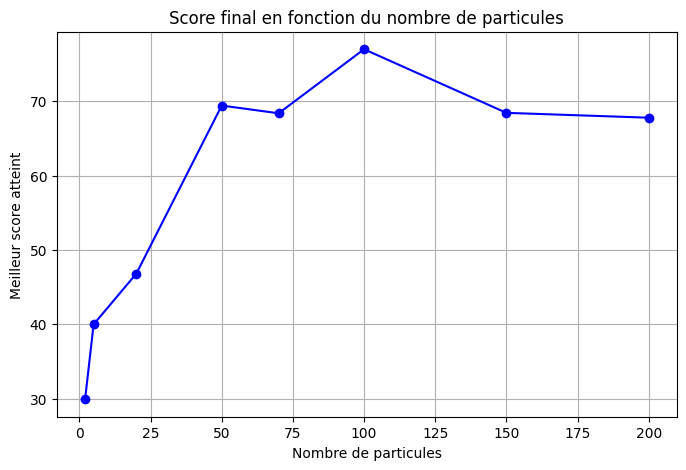

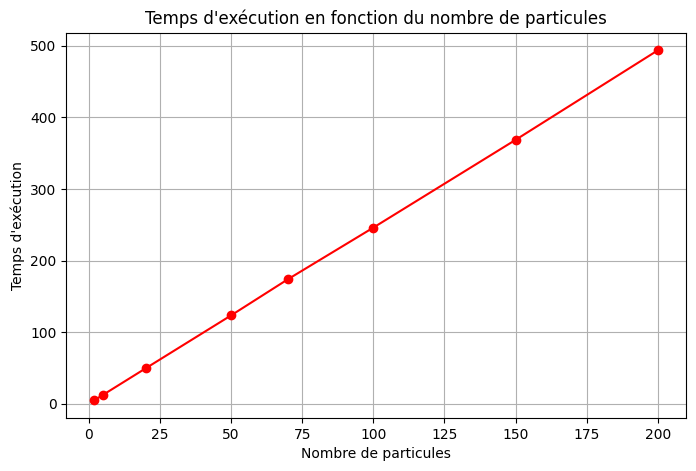

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from time import monotonic

# Paramètres
num_medics = 18
num_days = 183
max_iterations = 10
particle_counts = [2, 5,20,50,70,100,150,200] 
scores = [] 
execution_times = []
def run_pso(num_particles):
    # Initialisation
    particles = [planningdepart for _ in range(num_particles)]
    velocities = [np.zeros((num_days, num_medics)) for _ in range(num_particles)]
    personal_best_positions = particles[:]
    personal_best_scores = [score(p, prefG) for p in particles]
    global_best_position = personal_best_positions[np.argmax(personal_best_scores)]
    global_best_score = max(personal_best_scores)

    for iteration in range(max_iterations):
        for i in range(num_particles):
            r1, r2 = np.random.rand(), np.random.rand()
            velocities[i] = (
                velocities[i]
                + r1 * (np.array(personal_best_positions[i]) != np.array(particles[i])).astype(float)
                + r2 * (np.array(global_best_position) != np.array(particles[i])).astype(float)
            )
            for d in range(num_days):
                for m in range(num_medics):
                    if velocities[i][d][m] > 0.5:
                        particles[i][d][m] = np.random.choice(['R', 'G', 'A'])
            current_score = score(particles[i], prefG)
            if current_score > personal_best_scores[i]:
                personal_best_positions[i] = particles[i]
                personal_best_scores[i] = current_score

            if current_score > global_best_score:
                global_best_position = particles[i]
                global_best_score = current_score

    return global_best_score

for num_particles in particle_counts:
    print(f"Test avec {num_particles} particules...")
    start_time = monotonic()
    best_score = run_pso(num_particles)
    end_time = monotonic()
    execution_times.append(end_time - start_time)
    scores.append(best_score)
    
plt.figure(figsize=(10, 5))
print(particle_counts,execution_times)
# Tracé final
plt.figure(figsize=(8, 5))
plt.plot(particle_counts, scores, marker='o', linestyle='-', color='blue')
plt.xlabel("Nombre de particules")
plt.ylabel("Meilleur score atteint")
plt.title("Score final en fonction du nombre de particules")
plt.grid()
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(particle_counts,execution_times, marker='o', linestyle='-', color='red')
plt.xlabel("Nombre de particules")
plt.ylabel("Temps d'exécution")
plt.title("Temps d'exécution en fonction du nombre de particules")
plt.grid()
plt.show()

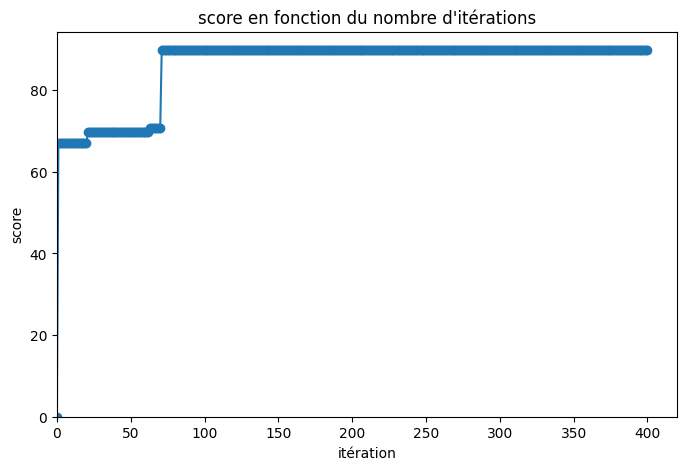

In [12]:
import matplotlib.pyplot as plt
L1 = [66.91836734693894 for _ in range(20)]
L2 = [69.65306122448996 for _ in range(42)]
L3 = [70.73469387755108 for _ in range(8)]
L4 = [89.79591836734716 for _ in range(330)]
L = [0]+L1+L2+L3+L4

X = [k for k in range(len(L))]
plt.figure(figsize=(8, 5))
plt.title("score en fonction du nombre d'itérations")
plt.plot(X, L, marker='o', linestyle='-')
plt.xlabel("itération")
plt.ylabel("score")
plt.xlim(0, None)  
plt.ylim(0, None)  
plt.show()

